In [6]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
import torch
import torch.nn as nn

In [7]:
# Given parameters
nx = 60
ny = 60
tf = 1.0
dt = 2.0e-3
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1
dims = (ny,nx)

# latent space dim.
f_list=np.array([3,4,5,6])
print('Latent Sapce Dim. {}'.format(f_list))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_SOPT_result = "../__result/ex16_diffusion/ex16_AE_swish_gappy_bndry_SOPT_result_seed_{}.p".format(seed)

# Gauss-Newton params
maxitr=4
tol=1e-8

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

Latent Sapce Dim. [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


In [8]:
# S-OPT
file_path_SOPT="/home/test/pylibROM_docker/pylibROM/tests/model/ex16_AE_bndry_SOPT_no_oversampling.p"
with open(file=file_path_SOPT, mode='rb') as ff:  
        msmt_idx_list = pickle.load(ff)

Dim. of latent space is 3
# of measurments: 12
[   0    8   18  240  419 2760 3179 3420 3564 3580 3594 3599]
Dim. of latent space is 4
# of measurments: 12
[   0   28  359  600  779  960 2160 2339 3059 3569 3592 3596]
Dim. of latent space is 5
# of measurments: 12
[   0   16   59  360 1740 1860 2339 2760 3359 3543 3547 3595]
Dim. of latent space is 6
# of measurments: 12
[   0   10   19   29   45   58  180 1680 3545 3562 3574 3595]


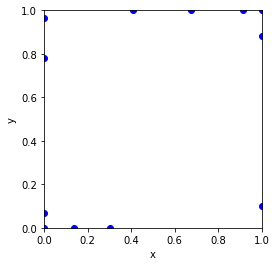

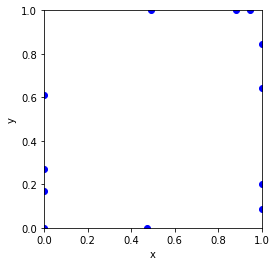

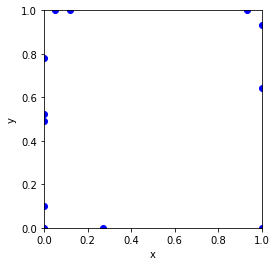

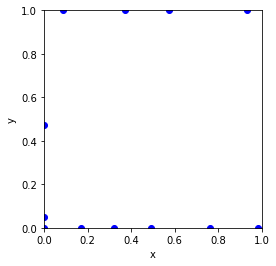

In [9]:
for ii in range(len(f_list)):
    f=f_list[ii]
    print("Dim. of latent space is {}".format(f))

    # file path
    file_path_residual_SVD="../__model/ex16_diffusion/ex16_AE_{}_swish_residual_SVD_seed_{}.p".format(f,seed)

    # SOPT
    msmt_idx=msmt_idx_list[ii]
    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig("../__result/ex16_diffusion/ex16_AE_{}_swish_bndry_SOPT_{}_samples_seed_{}.png".format(f,num_msmt,seed))

# gappyAE

Dim. of latent space is 3
# of measurments: 12
[   0    8   18  240  419 2760 3179 3420 3564 3580 3594 3599]


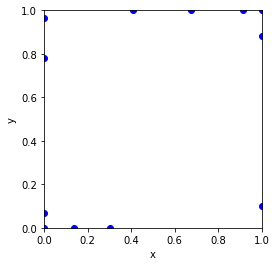

Param is 75
Time elapsed: 26.70952796936035 sec
average relative error of u: 0.23984286712505223%
maximum relative error of u: 0.4732139678932111%

Param is 76
Time elapsed: 16.228004455566406 sec
average relative error of u: 0.1869584812078162%
maximum relative error of u: 0.44609649092581793%

Param is 77
Time elapsed: 32.605611085891724 sec
average relative error of u: 0.14457916495310622%
maximum relative error of u: 0.42169030837667165%

Param is 78
Time elapsed: 35.315415143966675 sec
average relative error of u: 0.1122406222048654%
maximum relative error of u: 0.4003552909016255%

Param is 79
Time elapsed: 22.739052772521973 sec
average relative error of u: 0.0889657479308168%
maximum relative error of u: 0.38249526114752047%

Param is 80
Time elapsed: 45.31801414489746 sec
average relative error of u: 0.0732561714657806%
maximum relative error of u: 0.36813213547648954%

Param is 81
Time elapsed: 45.36244583129883 sec
average relative error of u: 0.06330710139123638%
maximum re

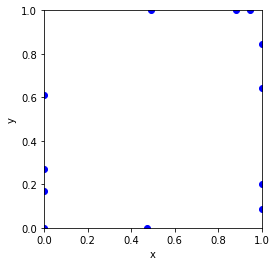

Param is 75
Time elapsed: 26.777905464172363 sec
average relative error of u: 0.24688828185103756%
maximum relative error of u: 1.1898796761261587%

Param is 76
Time elapsed: 25.742472410202026 sec
average relative error of u: 0.18836748499933662%
maximum relative error of u: 0.9847924099269035%

Param is 77
Time elapsed: 26.72458243370056 sec
average relative error of u: 0.1412750016527681%
maximum relative error of u: 0.8171575163421673%

Param is 78
Time elapsed: 27.309966325759888 sec
average relative error of u: 0.10562084590964983%
maximum relative error of u: 0.6856475372429616%

Param is 79
Time elapsed: 27.889651775360107 sec
average relative error of u: 0.0814279592342055%
maximum relative error of u: 0.5875412421424091%

Param is 80
Time elapsed: 28.089128732681274 sec
average relative error of u: 0.06802937086764273%
maximum relative error of u: 0.5186369556499201%

Param is 81
Time elapsed: 25.046108961105347 sec
average relative error of u: 0.06293559902753024%
maximum re

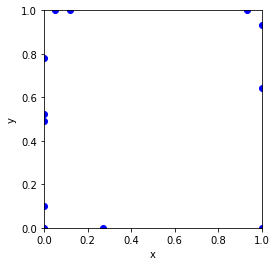

Param is 75
Time elapsed: 27.782299280166626 sec
average relative error of u: 0.26705873372216027%
maximum relative error of u: 0.6659024172817688%

Param is 76
Time elapsed: 28.998276472091675 sec
average relative error of u: 0.20476206469169708%
maximum relative error of u: 0.5727208463975589%

Param is 77
Time elapsed: 29.293935775756836 sec
average relative error of u: 0.15342726208677712%
maximum relative error of u: 0.5098797920957923%

Param is 78
Time elapsed: 31.363794803619385 sec
average relative error of u: 0.11367786039665716%
maximum relative error of u: 0.4687252776315926%

Param is 79
Time elapsed: 31.202309131622314 sec
average relative error of u: 0.08575827629214809%
maximum relative error of u: 0.4400049135570066%

Param is 80
Time elapsed: 31.363574266433716 sec
average relative error of u: 0.06903420933855452%
maximum relative error of u: 0.41718939243594966%

Param is 81
Time elapsed: 28.67733097076416 sec
average relative error of u: 0.061126663175450076%
maximu

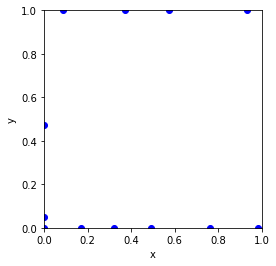

Param is 75
Time elapsed: 28.960154056549072 sec
average relative error of u: 0.3089947660585355%
maximum relative error of u: 1.3611274314002366%

Param is 76
Time elapsed: 31.237131595611572 sec
average relative error of u: 0.241514425872771%
maximum relative error of u: 1.178410572308848%

Param is 77
Time elapsed: 32.58069849014282 sec
average relative error of u: 0.18273327357174582%
maximum relative error of u: 0.9928922299804934%

Param is 78
Time elapsed: 32.10250473022461 sec
average relative error of u: 0.13527232301979664%
maximum relative error of u: 0.8355345513926622%

Param is 79
Time elapsed: 32.19996643066406 sec
average relative error of u: 0.10193684103131351%
maximum relative error of u: 0.717778504353036%

Param is 80
Time elapsed: 32.545554637908936 sec
average relative error of u: 0.0843269857891678%
maximum relative error of u: 0.6371919785345308%

Param is 81
Time elapsed: 33.762166023254395 sec
average relative error of u: 0.07965466950470358%
maximum relative

In [10]:
solution=np.zeros((len(f_list),len(FOM_parameters),nt+1,nx*ny))
reduced=np.zeros((len(f_list),len(FOM_parameters),nt+1,f_list[-1]))
avg_rel_err=np.zeros((len(f_list),len(FOM_parameters)))
rel_err=np.zeros((len(f_list),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(f_list),len(FOM_parameters)))

for ii in range(len(f_list)):
    f=f_list[ii]
    print("Dim. of latent space is {}".format(f))
    
    # file path
    file_name_AE="../__model/ex16_diffusion/ex16_AE_{}_swish_seed_{}.p".format(f,seed)
    file_path_residual_SVD="../__model/ex16_diffusion/ex16_AE_{}_swish_residual_SVD_seed_{}.p".format(f,seed)
    
    # SOPT
    msmt_idx=msmt_idx_list[ii]
    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    # precompute
    with open(file=file_path_residual_SVD, mode='rb') as fff:
        SVD=pickle.load(fff)
    U=SVD['U']
    phi_r=U[:,:num_msmt]
    ZTphi_r=phi_r[msmt_idx]
    ZTphi_r_pinv=np.linalg.pinv(ZTphi_r)
    phi_rZTphi_r_pinv=phi_r.dot(ZTphi_r_pinv)
        
    with open(file=file_name_AE, mode='rb') as ff:    
        AE = pickle.load(ff)

    en_wu1=AE['en_wu1']
    en_bu1=AE['en_bu1']
    en_wu2=AE['en_wu2']
    de_wu1=AE['de_wu1']
    de_bu1=AE['de_bu1']
    de_wu2=AE['de_wu2']
    de_wu1T=AE['de_wu1T']
    de_wu2T=AE['de_wu2T']
    de_wu2_sp=AE['de_wu2_sp']
    de_wu2T_sp=AE['de_wu2T_sp']
    u_ref=AE['u_ref']

    latent_dim=de_wu1.shape[1]
    
    # numpy version of AE
    def sigmoid_np(input):
        return (1.0/(1.0+np.exp(-input))).astype('float32')

    def encoder_u_np_forward(x):
        z1 = en_wu1.dot(x) + en_bu1
        a1 = z1 * sigmoid_np(z1)
        y = en_wu2.dot(a1)   
        return y

    def decoder_u_np_forward(x):
        z1 = de_wu1.dot(x) + de_bu1
        a1 = z1 * sigmoid_np(z1)
        y = de_wu2.dot(a1)  
        return y

    def decoder_u_sp_forward(x):
        z1 = de_wu1.dot(x) + de_bu1
        a1 = z1 * sigmoid_np(z1)
        y = sp.csr_matrix.dot(de_wu2_sp,a1)
        return y

    def decoder_u_np_forward_backwardT(x):
        z1 = de_wu1.dot(x) + de_bu1
        sigma = sigmoid_np(z1)
        a1 = z1 * sigma
        y = de_wu2.dot(a1)

        dout = de_wu1T
        dout = (sigma+a1*(1-sigma))*dout
        dydxT = dout.dot(de_wu2T)   
        return y,dydxT

    def decoder_u_sp_forward_backwardT(x):
        z1 = de_wu1.dot(x) + de_bu1
        sigma = sigmoid_np(z1)
        a1 = z1 * sigma
        y = sp.csr_matrix.dot(de_wu2_sp,a1)

        dout = de_wu1T
        dout = (sigma+a1*(1-sigma))*dout
        dydxT = sp.csr_matrix.dot(dout,de_wu2T_sp)
        return y,dydxT
    
    m,M2=de_wu2.shape

    class Decoder_U_FC(nn.Module):

        def __init__(self,):
            super(Decoder_U_FC, self).__init__()
            self.fc1 = nn.Linear(latent_dim,M2)
            self.fc1.weight = nn.Parameter(torch.ones(de_wu1.shape))
            self.fc1.bias = nn.Parameter(torch.ones(de_bu1.shape))
    #         self.fc1.weight = nn.Parameter(torch.tensor(de_wu1))
    #         self.fc1.bias = nn.Parameter(torch.tensor(de_bu1))

            self.fc2 = nn.Linear(M2,m,bias=False)
            self.fc2.weight = nn.Parameter(torch.ones(de_wu2.shape))
    #         self.fc2.weight = nn.Parameter(torch.tensor(de_wu2))

        def forward(self, x):
            x = self.fc1(x)
            x = self.fc2(x)
            return x

    model = Decoder_U_FC()

    x_in=torch.ones(latent_dim)
    y_out=model(x_in)

    p_hr=msmt_idx

    upstream=torch.zeros_like(y_out)
    upstream[p_hr]=1.0

    y_out.backward(upstream)

    # masks for subnet
    wu1_mask=model.fc1.weight.grad
    wu2_mask=model.fc2.weight.grad

    bu1_mask=model.fc1.bias.grad

    # subnet sparse weight
    idx1=wu1_mask.to_sparse()._indices()
    i1=idx1.numpy()[0]
    j1=idx1.numpy()[1]
    v1=de_wu1[i1,j1]
    wu1_sb_sp=sp.csr_matrix(sp.csr_matrix((v1,(i1,j1)),shape=wu1_mask.shape).toarray())

    idx2=wu2_mask.to_sparse()._indices()
    i2=idx2.numpy()[0]
    j2=idx2.numpy()[1]
    v2=de_wu2[i2,j2]
    wu2_sb_sp=sp.csr_matrix(sp.csr_matrix((v2,(i2,j2)),shape=wu2_mask.shape).toarray())

    # subnet compressed weight
    i1,j1,v1=sp.find(wu1_sb_sp)
    i1_unique,i1_inverse=np.unique(i1,return_inverse=True)
    i1_comp=np.arange(i1_unique.size)
    i1_comp=i1_comp[i1_inverse]
    j1_unique,j1_inverse=np.unique(j1,return_inverse=True)
    j1_comp=np.arange(j1_unique.size)
    j1_comp=j1_comp[j1_inverse]
    wu1_sb_comp_sp=sp.csr_matrix((v1,(i1_comp,j1_comp)),shape=(i1_unique.size,j1_unique.size))

    i2,j2,v2=sp.find(wu2_sb_sp)
    i2_unique,i2_inverse=np.unique(i2,return_inverse=True)
    i2_comp=np.arange(i2_unique.size)
    i2_comp=i2_comp[i2_inverse]
    j2_unique,j2_inverse=np.unique(j2,return_inverse=True)
    j2_comp=np.arange(j2_unique.size)
    j2_comp=j2_comp[j2_inverse]
    wu2_sb_comp_sp=sp.csr_matrix((v2,(i2_comp,j2_comp)),shape=(i2_unique.size,j2_unique.size))

    wu1_sb_comp_dense=wu1_sb_comp_sp.toarray()
    wu1_sb_comp_dense=wu1_sb_comp_dense[j2_unique]
    wu2_sb_comp_dense=wu2_sb_comp_sp.toarray()

    wu1_sb_comp_denseT=wu1_sb_comp_dense.T
    wu2_sb_comp_denseT=wu2_sb_comp_dense.T

    # subnet compressed bias
    bu1_sb_comp_dense=de_bu1[i1_unique]
    bu1_sb_comp_dense=bu1_sb_comp_dense[j2_unique]

    # Using sparse matrix
    wu2_sb_comp_sp=sp.csr_matrix(wu2_sb_comp_dense,dtype='float32')
    wu2_sb_comp_spT=sp.csr_matrix(wu2_sb_comp_denseT,dtype='float32')

    def decoder_u_sb_np_forward(x):
        z1 = wu1_sb_comp_dense.dot(x) + bu1_sb_comp_dense
        a1 = z1 * sigmoid_np(z1)
        y = wu2_sb_comp_dense.dot(a1)  
        return y

    def decoder_u_sb_np_forward_backwardT(x):
        z1 = wu1_sb_comp_dense.dot(x) + bu1_sb_comp_dense
        sigma = sigmoid_np(z1)
        a1 = z1 * sigma
        y = wu2_sb_comp_dense.dot(a1) 

        dout = wu1_sb_comp_denseT
        dout = (sigma+a1*(1-sigma))*dout
        dydxT = dout.dot(wu2_sb_comp_denseT)
        return y,dydxT

    def decoder_u_sb_sp_forward(x):
        z1 = wu1_sb_comp_dense.dot(x) + bu1_sb_comp_dense
        a1 = z1 * sigmoid_np(z1)
        y = sp.csr_matrix.dot(wu2_sb_comp_sp,a1)
        return y

    def decoder_u_sb_sp_forward_backwardT(x):
        z1 = wu1_sb_comp_dense.dot(x) + bu1_sb_comp_dense
        sigma = sigmoid_np(z1)
        a1 = z1 * sigma
        y = sp.csr_matrix.dot(wu2_sb_comp_sp,a1)

        dout = wu1_sb_comp_denseT
        dout = (sigma+a1*(1-sigma))*dout
        dydxT = sp.csr_matrix.dot(dout,wu2_sb_comp_spT)
        return y,dydxT

    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex16_diffusion/ex16_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1).astype('float32')

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_hat0=encoder_u_np_forward(u0.astype('float32')-u_ref)

        # gappyAE
        t_start_gappyAE=time.time()

        # solution
        u_reduced=np.zeros((nt+1,latent_dim))
        u_gappyAE=np.zeros((nt+1,ny*nx))

        # IC
        u_reduced[0]=np.copy(u_hat0)
        u_gappyAE[0]=np.copy(u0)

        for k in range(nt):
#             print("")
#             print(k,"th time step:")

            u_hatw=np.copy(u_reduced[k])

            umw,Jg_umT=decoder_u_sb_sp_forward_backwardT(u_hatw)

            umw += u_ref[msmt_idx]

            J_r=-Jg_umT.T
            J_pinv=np.linalg.pinv(ZTphi_r_pinv.dot(J_r)).dot(ZTphi_r_pinv)

            r_um_hat = um[k+1]-umw

            res = np.linalg.norm(J_pinv.dot(r_um_hat))
#             res = np.linalg.norm(r_um_hat)
            res_hist=[res]
            for itr in range(maxitr):
                du_hatw = J_pinv.dot(r_um_hat)

                u_hatw -= du_hatw

                umw,Jg_umT=decoder_u_sb_sp_forward_backwardT(u_hatw)

                umw += u_ref[msmt_idx]

                J_r=-Jg_umT.T
                J_pinv=np.linalg.pinv(ZTphi_r_pinv.dot(J_r)).dot(ZTphi_r_pinv)

                r_um_hat = um[k+1]-umw

                res = np.linalg.norm(J_pinv.dot(r_um_hat))
#                 res = np.linalg.norm(r_um_hat)
                res_hist.append(res)
#                 print(itr,"th Newton iteration", "res:", "{:.8e}".format(res))

                if res<tol:
                    break

            u_reduced[k+1]=u_hatw.copy()
            u_gappyAE[k+1]=u_ref+decoder_u_sp_forward(u_reduced[k+1])

        # elapsed time    
        t_elapsed_gappyAE=time.time()-t_start_gappyAE
        print('Time elapsed: {} sec'.format(t_elapsed_gappyAE))

        # error
        u_rel_err_gappyAE=np.linalg.norm(u_full-u_gappyAE,ord=2,axis=1)\
                         /np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyAE,ord=2,axis=1)**2))\
                     /np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyAE)))
        print()

        # save result
        solution[ii,jj]=u_gappyAE
        reduced[ii,jj,:,:f]=u_reduced
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyAE
        elapsed_time[ii,jj]=t_elapsed_gappyAE
    
results={'solution':solution,'reduced':reduced,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_SOPT_result, mode='wb') as ff:
    pickle.dump(results, ff)

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

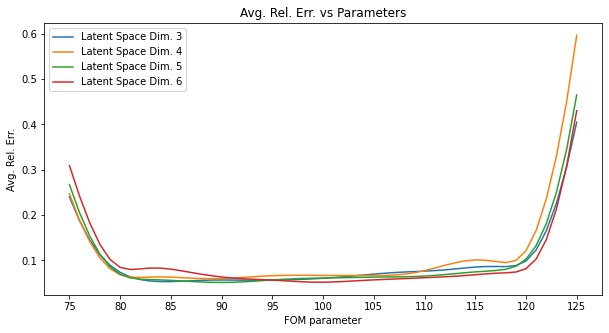

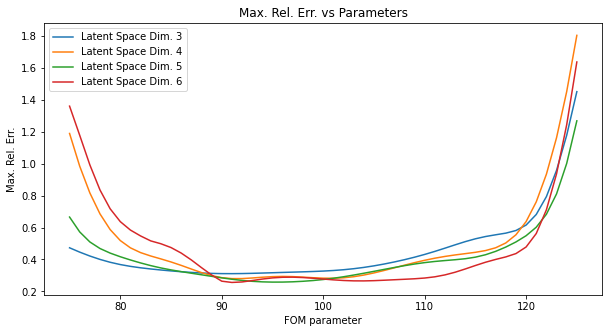

In [11]:
# with open(file=file_path_gappy_SOPT_result, mode='rb') as ff:
#     results=pickle.load(ff)    

idx=[0,1,2,3]

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:  
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
#     plt.scatter(FOM_parameters[p_inter:-p_inter:p_inter],results['avg_rel_err'][i][p_inter:-p_inter:p_inter], color = 'blue')
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["Latent Space Dim. "+str(f) for f in f_list[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex16_diffusion/ex16_AE_{}_SOPT_avg_rel_err_seed_{}.png".format(f,seed))

# figure rel.err vs data points
plt.figure(figsize=(10,5)) 
for i in idx:  
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
#     plt.scatter(FOM_parameters[p_inter:-p_inter:p_inter],results['rel_err'][i].max(axis=1)[p_inter:-p_inter:p_inter], color = 'blue')
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["Latent Space Dim. "+str(f) for f in f_list[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex16_diffusion/ex16_AE_{}_SOPT_max_rel_err_seed_{}.png".format(f,seed))

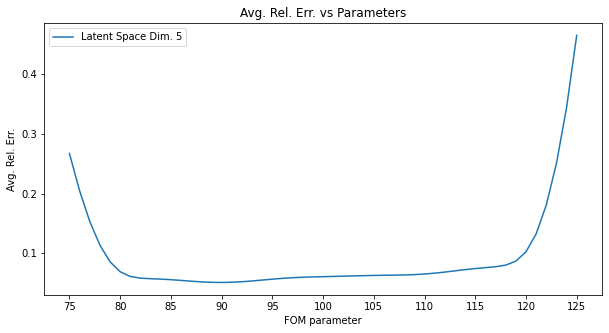

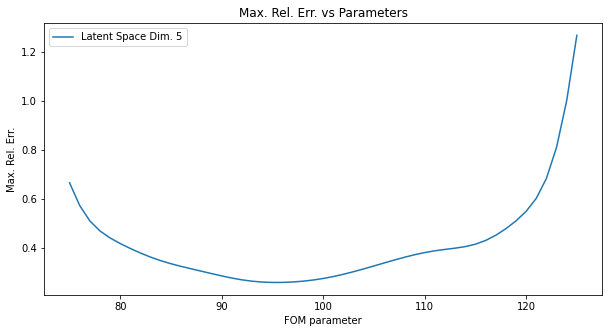

In [16]:
# with open(file=file_path_gappy_SOPT_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# idx=[0,1,2,3]
idx = [2]

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:  
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
#     plt.scatter(FOM_parameters[p_inter:-p_inter:p_inter],results['avg_rel_err'][i][p_inter:-p_inter:p_inter], color = 'blue')
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["Latent Space Dim. "+str(f) for f in f_list[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
plt.show()

# figure rel.err vs data points
plt.figure(figsize=(10,5)) 
for i in idx:  
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
#     plt.scatter(FOM_parameters[p_inter:-p_inter:p_inter],results['rel_err'][i].max(axis=1)[p_inter:-p_inter:p_inter], color = 'blue')
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["Latent Space Dim. "+str(f) for f in f_list[idx]])
plt.title('Max. Rel. Err. vs Parameters')
plt.show()

In [13]:
print(f_list)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


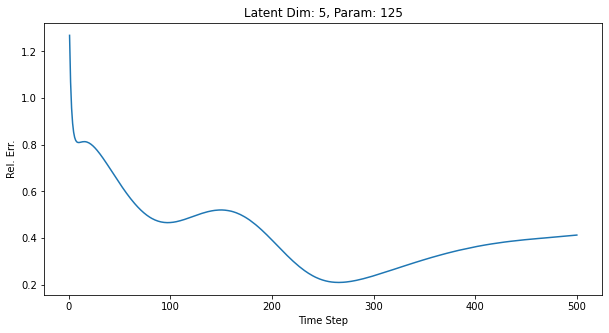

average relative error of u: 0.4649079695109969%

maximum relative error of u: 1.2691551741251579%


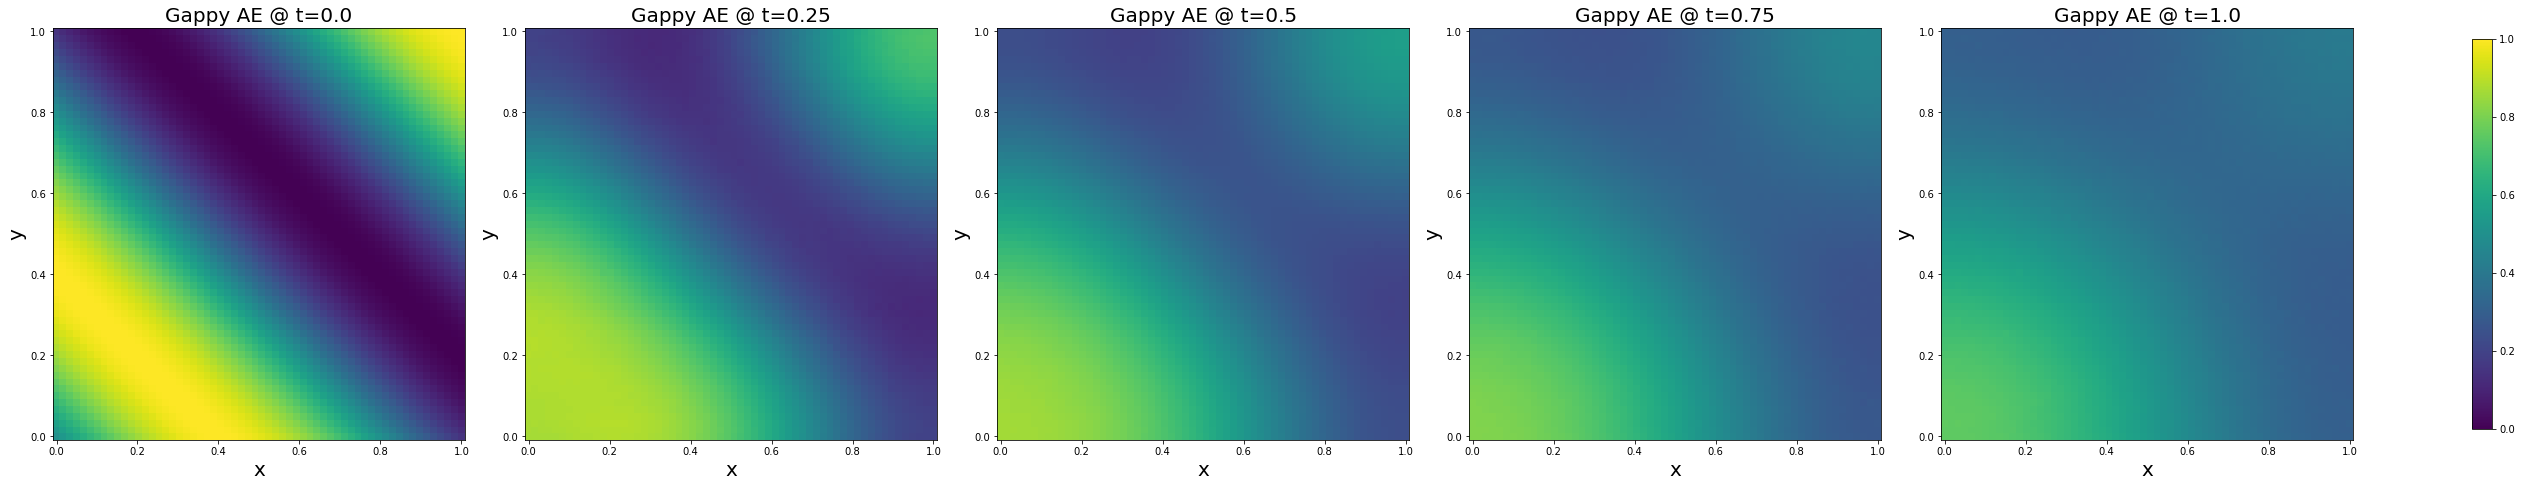

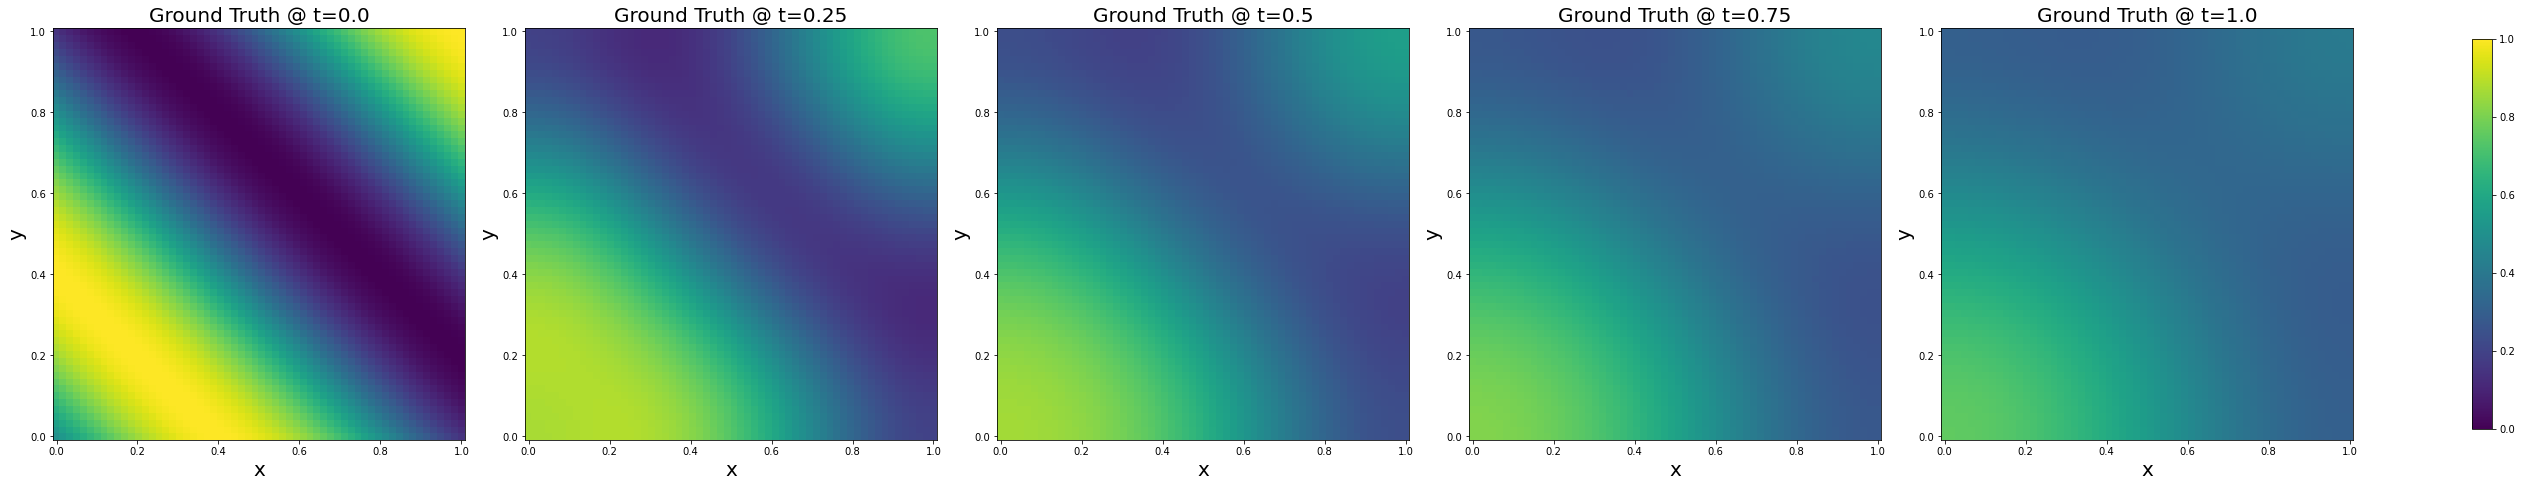

In [17]:
# figure rel.err vs at given param and POD basis
i=2; j=-1        
f=f_list[i]
param=FOM_parameters[j]

u_gappyAE=results['solution'][i,j]

ex = np.load('../__data/ex16_diffusion/ex16_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("Latent Dim: {}, Param: {}".format(f,param))
plt.show()

# error
u_rel_err_gappyAE=np.linalg.norm(u_full-u_gappyAE,ord=2,axis=1)\
                 /np.linalg.norm(u_full,ord=2,axis=1)*100
u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyAE,ord=2,axis=1)**2))\
             /np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
print("average relative error of u: {}%".format(u_avg_rel_err))
print()
print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyAE)))
    
# plot original data
vmin=0; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyAE[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy AE @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex16_diffusion/ex16_AE_{}_SOPT_SOL_seed_{}.png".format(f,seed))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex16_diffusion/ex16_ground_truth.png")

f=6
param=125


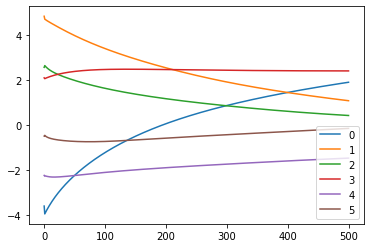

In [15]:
i=3; j=-1
f=f_list[i]; param=FOM_parameters[j]
print("f={}".format(f))
print("param={}".format(param))
plt.plot(results['reduced'][i,j][:,:f])
plt.legend(np.arange(f))
plt.show()